#### INFO7390 Adv Data Sci  
## **Assignment 2 Kaggle Competition**  
    
Name: Fangqing Wu  
NUID: 001305642

---
**License**  
This project is licensed under [MIT License](https://raw.githubusercontent.com/fwqfwq/dataset/master/MIT%20License)
\
\
**Links**  
Google Colab: https://colab.research.google.com/drive/1qzXeIHJH7yAE3riIfb_qWbdVdFK2Hx3J?usp=sharing   

Dataset: https://www.kaggle.com/c/GiveMeSomeCredit/data 








---
### **Abstract**  
This project is a competition on kaggle, "Give Me Some Credit", and the goal is to build a model that borrowers can use to help make the best financial decisions.   

This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.  

Historical data are provided on 250,000 borrowers. 




   
### **Dataset Introduction** 

The main data repository consistes of:  

*   cs-training.csv
*   cs-test.csv
*   Data Dictionary.csv
\
\
All the features and the descriptions are stored in 'Data Dictionary.csv' with 11 features.   

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


**Features Introduction**

In [ ]:
pd.set_option('display.max_colwidth', -1)
pd.read_csv("https://raw.githubusercontent.com/fwqfwq/dataset/master/GiveMeSomeCredit/Data%20Dictionary.csv")

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days past due but no worse in the last 2 years.,integer


**Scenario**:  
Among all the features, '*SeriousDlqin2yrs*' would be the target feature to predict the borrowers' risk for a 90 days past due delinquency or worse. 

 

### **Data Preprocessing**

#### - Data Import & Clean


In [ ]:
url = 'https://raw.githubusercontent.com/fwqfwq/dataset/master/GiveMeSomeCredit/cs-training.csv'
dataset = pd.read_csv(url)
print(dataset.columns.values)

['Unnamed: 0' 'SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines'
 'age' 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfDependents']


The first column is 'Unnamed: 0' which is the originla index for the training data, which could be truncated later.  
\
**Basic View**

In [ ]:
dataset = (dataset.iloc[:, 1:])
dataset.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [ ]:
dataset.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

As seen, two deatures, '*MonthlyIncome*' and '*NumberOfDependents*' are not intact. Especially when '*MonthlyIncome*' has a substantial amount of missing values. 

**Data Dropping & Filling**  

First of all, drop the NaN in '*NumberOfDependents*' 

In [ ]:
dataset.dropna(axis=0, subset=['NumberOfDependents'], inplace=True) 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146076 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      146076 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  146076 non-null  float64
 2   age                                   146076 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  146076 non-null  int64  
 4   DebtRatio                             146076 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       146076 non-null  int64  
 7   NumberOfTimes90DaysLate               146076 non-null  int64  
 8   NumberRealEstateLoansOrLines          146076 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  146076 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

Monthly income is not a feature with continuous value. It's related more closer to other features.   
Random forest (RF) missing data algorithms[[1]](#reference) is
an approach for imputing missing data. Random Forests Regressor model could be used to calculate and fill the NaN in '*MonthlyIncome*'. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Change the order of features
fill_data = dataset.iloc[:, [5,0,1,2,3,4,6,7,8,9,10]]

# Extract and split the NaN value
not_series = pd.notnull(fill_data['MonthlyIncome'])
fill_known = fill_data[not_series]

is_series = pd.isnull(fill_data['MonthlyIncome'])
fill_unknown = fill_data[is_series]

print('Not NaN:\n', fill_known.head())
print('Is NaN:\n', fill_unknown.head())

Not NaN:
    MonthlyIncome  ...  NumberOfDependents
0  9120.0         ...  2.0               
1  2600.0         ...  1.0               
2  3042.0         ...  0.0               
3  3300.0         ...  0.0               
4  63588.0        ...  0.0               

[5 rows x 11 columns]
Is NaN:
     MonthlyIncome  ...  NumberOfDependents
6  NaN             ...  0.0               
16 NaN             ...  0.0               
32 NaN             ...  0.0               
41 NaN             ...  0.0               
52 NaN             ...  0.0               

[5 rows x 11 columns]


In [ ]:
# Process the train data 
fill_X = fill_known.iloc[:, 1:]
fill_Y = fill_known.iloc[:, 0]
print('X:\n', fill_X.head(), '\n', fill_X.shape)
print('\nY:\n', fill_Y.head(), '\n', fill_Y.shape)

X:
    SeriousDlqin2yrs  ...  NumberOfDependents
0  1                 ...  2.0               
1  0                 ...  1.0               
2  0                 ...  0.0               
3  0                 ...  0.0               
4  0                 ...  0.0               

[5 rows x 10 columns] 
 (120269, 10)

Y:
 0    9120.0 
1    2600.0 
2    3042.0 
3    3300.0 
4    63588.0
Name: MonthlyIncome, dtype: float64 
 (120269,)


In [ ]:
# Random forests model
fill_rf = RandomForestRegressor(random_state=0,n_estimators=200,max_depth=3,n_jobs=-1)
fill_rf.fit(fill_X, fill_Y)
fill_predict = fill_rf.predict(fill_unknown.iloc[:, 1:]).round(0)

fill_predict

array([8311., 8311., 2554., ..., 1159., 2554., 2554.])

In [ ]:
print('original NaN\n', fill_unknown.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25807 entries, 6 to 149997
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MonthlyIncome                         0 non-null      float64
 1   SeriousDlqin2yrs                      25807 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  25807 non-null  float64
 3   age                                   25807 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  25807 non-null  int64  
 5   DebtRatio                             25807 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       25807 non-null  int64  
 7   NumberOfTimes90DaysLate               25807 non-null  int64  
 8   NumberRealEstateLoansOrLines          25807 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  25807 non-null  int64  
 10  NumberOfDependents                    25807 non-null  float64
dtypes: float64(4),

In [ ]:
# Create new filled data
new_result = fill_unknown.iloc[:, 1:]
new_result.insert(5, 'MonthlyIncome', fill_predict, True)

In [ ]:
new_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25807 entries, 6 to 149997
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      25807 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  25807 non-null  float64
 2   age                                   25807 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  25807 non-null  int64  
 4   DebtRatio                             25807 non-null  float64
 5   MonthlyIncome                         25807 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       25807 non-null  int64  
 7   NumberOfTimes90DaysLate               25807 non-null  int64  
 8   NumberRealEstateLoansOrLines          25807 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  25807 non-null  int64  
 10  NumberOfDependents                    25807 non-null  float64
dtypes: float64(4),

In [ ]:
# Update the original dataset
# 1. dropna  2. append
data = dataset.dropna(axis=0)
data = data.append(new_result)
pd.isnull(data).sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146076 entries, 0 to 149997
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      146076 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  146076 non-null  float64
 2   age                                   146076 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  146076 non-null  int64  
 4   DebtRatio                             146076 non-null  float64
 5   MonthlyIncome                         146076 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       146076 non-null  int64  
 7   NumberOfTimes90DaysLate               146076 non-null  int64  
 8   NumberRealEstateLoansOrLines          146076 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  146076 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### **Data Visualization**  
In this part, some features and statistical relationship with target variable would be visualized. 


**First-sight**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe00f6bc860>,
      dtype=object)

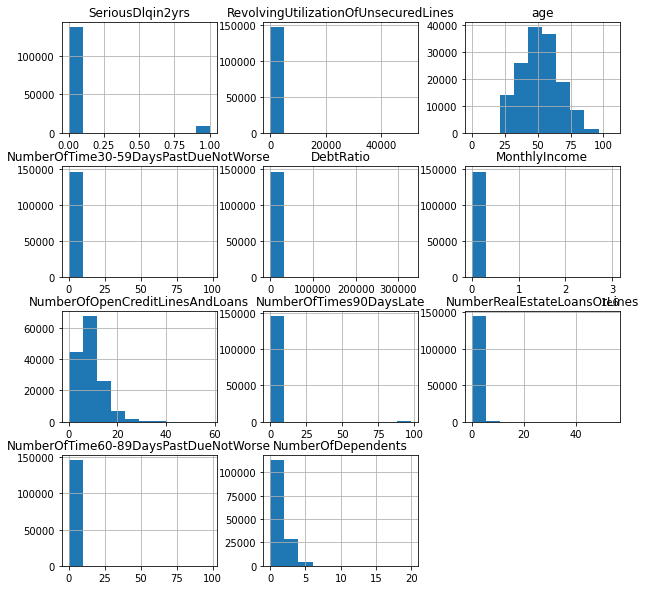

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.hist(ax = ax)

As seen in the hist() graph, several features are not evenly distributed. To prove that, Heatmap could be used to see the correlations for all features. 

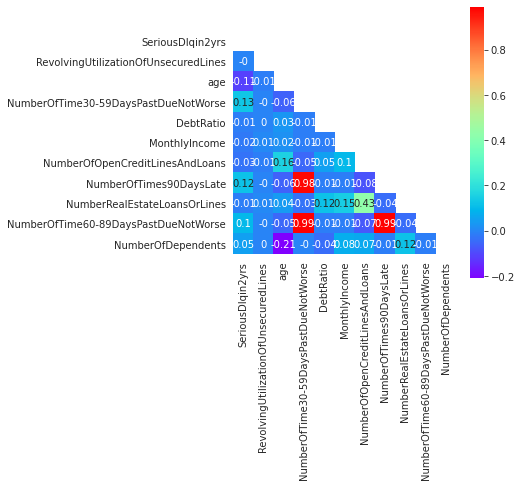

In [ ]:
plt.figure(figsize=(5,5))

mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data.corr().round(2), mask=mask,
                     annot=True, cmap='rainbow', square=True)

For the target feature, '*SeriousDiqin2yrs*', there're not obvious correlations with other features. To fix this, the data should be modified again. 

**A normal feature example**

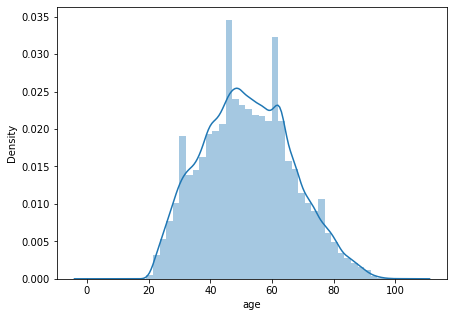

In [ ]:
plt.figure(figsize=(7,5))
age = data['age']
sns.distplot(age)

Basically, the feature above is under normal distribution. 

**Modification**  
\
'*MonthlyIncome*'

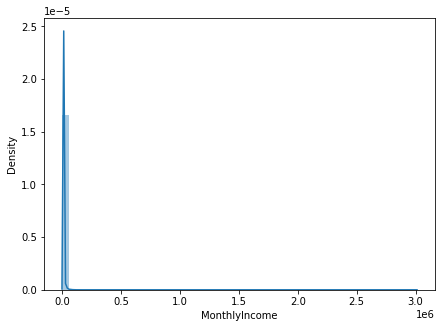

In [ ]:
plt.figure(figsize=(7,5))
mi = data['MonthlyIncome']
sns.distplot(mi)

# Remove outliers
# Values above the 99.9th percentile were dropped
percentile_mi = data['MonthlyIncome'].quantile(0.999)
data = data[-(data['MonthlyIncome'] > percentile_mi)]

Abnormality exists. Drop them by percentage. 

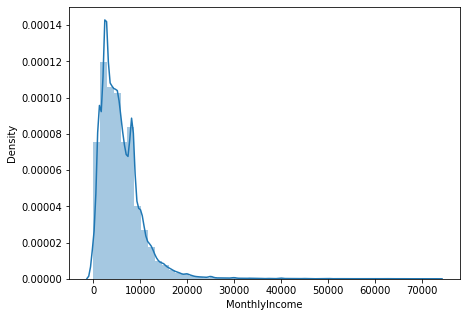

In [ ]:
plt.figure(figsize=(7,5))
mi = data['MonthlyIncome']
sns.distplot(mi)



---

'*NumberOfTimes90DaysLate*', '*NumberOfTime30-59DaysPastDueNotWorse*', '*NumberOfTime60-89DaysPastDueNotWorse*'

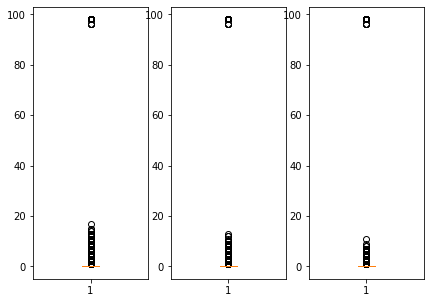

In [ ]:
cols = ['NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse']
fig, axs = plt.subplots(1, 3, figsize=(7,5))
for ax, col in zip(axs, cols):
    ax.boxplot(data[col])
plt.show()

Abnormality exists. Drop them by percentage. 

In [ ]:
# Remove outliers
# Values above the 99.7th percentile were dropped
for col in cols:
  pct = data[col].quantile(0.997)
  data = data[-(data[col] > pct)]

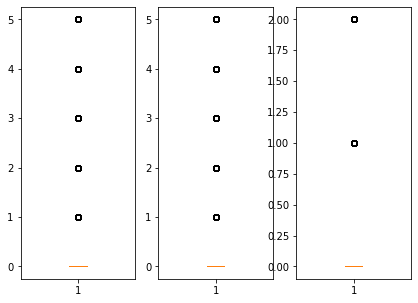

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(7,5))
for ax, col in zip(axs, cols):
    ax.boxplot(data[col])
plt.show()



---

After test, these three features, 
'*DebtRatio*', '*NumberRealEstateLoansOrLines*', '*RevolvingUtilizationOfUnsecuredLines*', are not very suitable for modifications. 

**Heatmap /again**

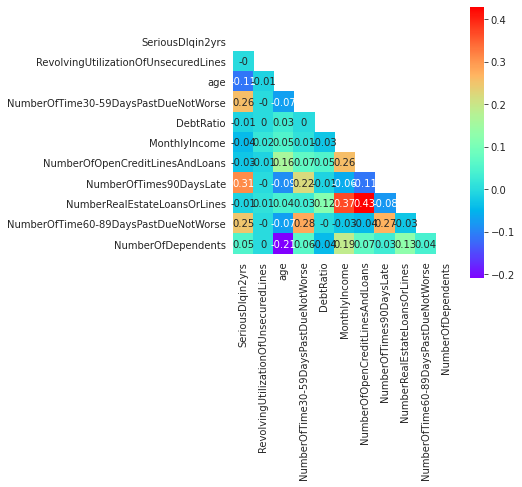

In [ ]:
plt.figure(figsize=(5,5))

mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data.corr().round(2), mask=mask,
                     annot=True, cmap='rainbow', square=True)

'*NumberOfTimes90DaysLate*', '*NumberOfTime30-59DaysPastDueNotWorse*' and '*NumberOfTime60-89DaysPastDueNotWorse*' are most related features to the target feature('*SeriousDlqin2yrs*')

In [ ]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
data_scaled = scaled_df(data)

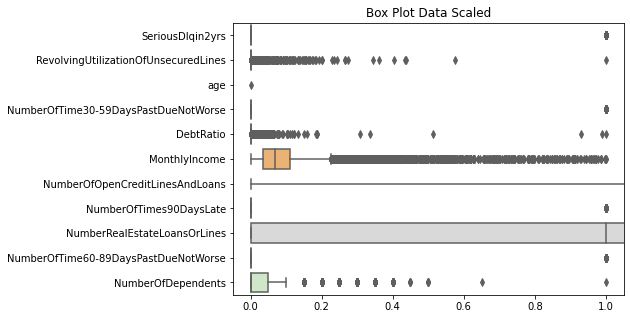

In [ ]:
f, ax = plt.subplots(figsize=(7,5))
plt.title("Box Plot Data Scaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = data_scaled[1:], 
  orient = 'h', 
  palette = 'Set3')

### **Data Predictions** 
As can be seen, the target feature of dataset is binary, with only values of 0 and 1. So when we are trying to consider the algorithms that suit this dataset, the ones inclined for discrete data should be selsected.     
Three algorithms would be used in this part to see which is the best: 
*   Logistic Regression
*   Random Forests 
*   Xgboost  
\
First, split the train and test data. 

In [ ]:
target = data.iloc[:, 0]
data = data.iloc[:, 1:]

X_train, X_test, Y_train, Y_test = train_test_split(data, target, random_state=1)

print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("Y train shape: ", Y_train.shape)
print("Y test shape: ", Y_test.shape)

X train shape:  (108631, 10)
X test shape:  (36211, 10)
Y train shape:  (108631,)
Y test shape:  (36211,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score, classification_report


**Models Training & Evaluation**

- Logistic Regression

In [ ]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
for i in solver: 
  lr = LogisticRegression(solver=i)
  lr.fit(X_train, Y_train)

  scores.append(lr.score(X_test, Y_test))

Text(0, 0.5, 'Score')

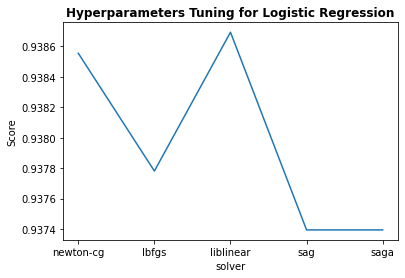

In [ ]:
plt.plot(solver, scores)
plt.title('Hyperparameters Tuning for Logistic Regression', weight='bold')
plt.xlabel('solver')
plt.ylabel('Score')

Liblinear solver is the best choice for solver.

In [ ]:
lrm = LogisticRegression(solver='liblinear')
lrm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Scores


1.   Default Score
2.   R2 & MSE
3.   Classfication Report
4.   ROC AUC



In [ ]:
lrm.score(X_test, Y_test)

0.9386926624506365

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr_predict = lrm.predict(X_test)

# R2 Score & Mean Squared Error
r2_lr = r2_score(Y_test, lr_predict)
print("r2 score: ", r2_lr)

mse_lr = mean_squared_error(Y_test, lr_predict)
print("mse score: ", mse_lr)

r2 score:  -0.044669593063891844
mse score:  0.061307337549363454


In [ ]:
print(classification_report(Y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     33944
           1       0.55      0.12      0.20      2267

    accuracy                           0.94     36211
   macro avg       0.75      0.56      0.58     36211
weighted avg       0.92      0.94      0.92     36211



ROC AUC Score:  0.7957486751837349


Text(0, 0.5, 'True Positive Rates')

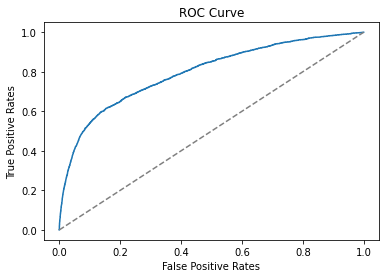

In [ ]:
lr_probility = lrm.predict_proba(X_test)

# Slice out the probaility
lr_score = roc_auc_score(Y_test, lr_probility[:, 1])
print('ROC AUC Score: ', lr_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, lr_probility[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'grey', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')

- Random Forests

In [ ]:
scores_rf = []
# Try different estimators
for i in range(50):
  rf = RandomForestClassifier(max_depth=3, n_estimators=i+1)
  rf.fit(X_train, Y_train)

  score = rf.score(X_test, Y_test)
  scores_rf.append(score)

Text(0, 0.5, 'Score')

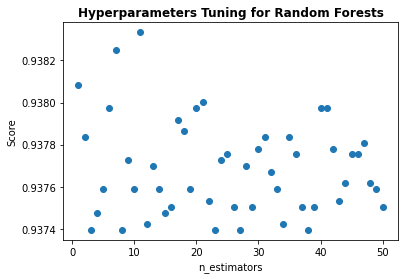

In [ ]:
plt.scatter(range(1,51), scores_rf)
plt.title('Hyperparameters Tuning for Random Forests', weight='bold')
plt.xlabel('n_estimators')
plt.ylabel('Score')

Each run time the results for different estimators would be differnet. Choose the best performance. 

Scores


1.   Default Score
2.   R2 & MSE
3.   Classfication Report
4.   ROC AUC


In [ ]:

rfm = RandomForestClassifier(max_depth=5, n_estimators=scores_rf.index(max(scores_rf)))
rfm.fit(X_train, Y_train)

rfm.score(X_test, Y_test)

0.9386650465328216

In [ ]:
rf_predict = rfm.predict(X_test)

# R2 Score & Mean Squared Error
r2_rf = r2_score(Y_test, rf_predict)
print("r2 score: ", r2_rf)

mse_rf = mean_squared_error(Y_test, rf_predict)
print("mse score: ", mse_rf)

r2 score:  -0.04514016495265949
mse score:  0.06133495346717848


In [ ]:
print(classification_report(Y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     33944
           1       0.56      0.09      0.16      2267

    accuracy                           0.94     36211
   macro avg       0.75      0.54      0.56     36211
weighted avg       0.92      0.94      0.92     36211



ROC AUC Score:  0.8448295986820089


Text(0, 0.5, 'True Positive Rates')

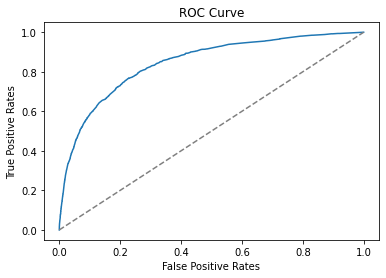

In [ ]:
rf_probility = rfm.predict_proba(X_test)

# Slice out the probaility
rf_score = roc_auc_score(Y_test, rf_probility[:, 1])
print('ROC AUC Score: ', rf_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, rf_probility[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'grey', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')

- Xgboost

Due to the data, xgboost algorithm[[2]](#reference) could be tried. 


\
The default xgboost uses 'gbtree' booster, which is suitable for the dataset.   
gamma[[3]](#reference): minimum loss reduction required to make a further partition on a leaf node of the tree, a complexity control.
The higher Gamma is, the higher the regularization. Default value is 0 (no regularization).


In [ ]:
scores_xgb = []

for i in range(20): 
  xgb = XGBClassifier(gamma=i)
  xgb.fit(X_train, Y_train) 
  scores_xgb.append(xgb.score(X_test, Y_test))

Text(0, 0.5, 'Score')

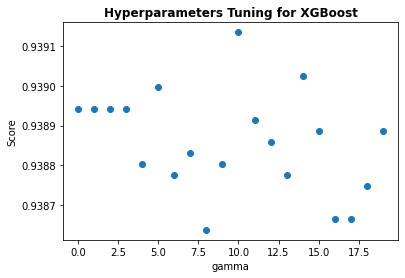

In [ ]:
plt.scatter(range(20), scores_xgb)
plt.title('Hyperparameters Tuning for XGBoost', weight='bold')
plt.xlabel('gamma')
plt.ylabel('Score')

Change more hyperparameters. 

In [ ]:
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 1, 2, 5, 10, 12, 15],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3.5, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [50, 100, 250, 500, 1000]}

In [ ]:
# Use RandomizedSearchCV to do randomized search on hyper parameters. 
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier()
xgb_rscv = RandomizedSearchCV(xgb, param_distributions = parameters, scoring = "f1_micro",
                             cv = 7, verbose = 3, random_state = 40)
xgbm = xgb_rscv.fit(X_train, Y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=1.0, score=0.938, total=  10.7s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=1.0, score=0.939, total=  10.6s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.3s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=1.0, score=0.938, total=  10.5s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=1.0, score=0.938, total=  10.6s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=1.0, score=0.940, total=  10.6s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lam

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed: 31.1min finished


In [ ]:
# Best estimators
print("Learning Rate: ", xgbm.best_estimator_.get_params()["learning_rate"])
print("Gamma: ", xgbm.best_estimator_.get_params()["gamma"])
print("Max Depth: ", xgbm.best_estimator_.get_params()["max_depth"])
print("Subsample: ", xgbm.best_estimator_.get_params()["subsample"])
print("Max Features at Split: ", xgbm.best_estimator_.get_params()["colsample_bytree"])
print("Alpha: ", xgbm.best_estimator_.get_params()["reg_alpha"])
print("Lamda: ", xgbm.best_estimator_.get_params()["reg_lambda"])
print("Minimum Sum of the Instance Weight Hessian to Make a Child: ",
      xgbm.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", xgbm.best_estimator_.get_params()["n_estimators"])

Learning Rate:  0.01
Gamma:  12
Max Depth:  2
Subsample:  0.7
Max Features at Split:  0.3
Alpha:  1
Lamda:  3.5
Minimum Sum of the Instance Weight Hessian to Make a Child:  1
Number of Trees:  1000


In [ ]:
xgbm = XGBClassifier(learning_rate=0.01, gamma=12, max_depth=2, 
                     subsample=0.7, colsample_bytree=0.3, reg_alpha=1,
                     reg_lambda=3.5, min_child_weight=1, n_estimators=1000)

xgbm.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=12,
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=3.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

Scores


1.   Default Score
2.   R2 & MSE
3.   Classfication Report
4.   ROC AUC


In [ ]:
xgbm.score(X_test, Y_test)

0.9386926624506365

In [ ]:
xgb_predict = xgbm.predict(X_test)

# R2 Score & Mean Squared Error
r2_xgb = r2_score(Y_test, xgb_predict)
print("r2 score: ", r2_xgb)

mse_xgb = mean_squared_error(Y_test, xgb_predict)
print("mse score: ", mse_xgb)

r2 score:  -0.044669593063891844
mse score:  0.061307337549363454


In [ ]:
print(classification_report(Y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     33944
           1       0.54      0.13      0.21      2267

    accuracy                           0.94     36211
   macro avg       0.74      0.56      0.59     36211
weighted avg       0.92      0.94      0.92     36211



ROC AUC Score:  0.8527691916554534


Text(0, 0.5, 'True Positive Rates')

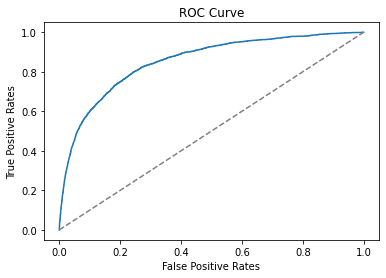

In [ ]:
xgb_probility = xgbm.predict_proba(X_test)

# Slice out the probaility
xgb_score = roc_auc_score(Y_test, xgb_probility[:, 1])
print('ROC AUC Score: ', xgb_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, xgb_probility[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'grey', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')



---

For this single time running: 
XGBoost algorithm has a better permance than Logistic Regression. 

### **Testing**  
Apply model to 'cs_test.csv'.  

In [ ]:
url_test = 'https://raw.githubusercontent.com/fwqfwq/dataset/master/GiveMeSomeCredit/cs-test.csv'
test_data = pd.read_csv(url_test)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [ ]:
test_data = test_data.iloc[:, 2:]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 1   age                                   101503 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 3   DebtRatio                             101503 non-null  float64
 4   MonthlyIncome                         81400 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 6   NumberOfTimes90DaysLate               101503 non-null  int64  
 7   NumberRealEstateLoansOrLines          101503 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 9   NumberOfDependents                    98877 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 7.7 MB


Simply fill the NaN. 

In [ ]:
test_data['MonthlyIncome'].fillna(test_data['MonthlyIncome'].mean(), inplace=True)
test_data['NumberOfDependents'].fillna(0, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 1   age                                   101503 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 3   DebtRatio                             101503 non-null  float64
 4   MonthlyIncome                         101503 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 6   NumberOfTimes90DaysLate               101503 non-null  int64  
 7   NumberRealEstateLoansOrLines          101503 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 9   NumberOfDependents                    101503 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 7.7 MB


In [ ]:
test_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


Predict the test data. 

In [ ]:
predicted_test = xgbm.predict_proba(test_data)
predicted_test

array([[0.9260841 , 0.07391588],
       [0.94253397, 0.057466  ],
       [0.98402315, 0.01597682],
       ...,
       [0.98952717, 0.01047285],
       [0.9202913 , 0.0797087 ],
       [0.95250374, 0.04749627]], dtype=float32)

Output the 'prediction.csv'. 

In [ ]:
output = pd.DataFrame({'id':test_data.index + 1, 'probability':predicted_test[:, 1]})
output.to_csv("predictions.csv", index=False)

In [ ]:
from google.colab import files
files.download("predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


### **Conclusion**  
 
There are several points fluctuating the result：
- Data filling with random forests algorithm, which might have variance. 
- Data clean is not sure about the result of leanng. 
- Models. 


After choosing Random Forests model, the test score is 0.938. 
\
And testing with the cs_test.csv, the scores after submission is 0.85639.  




### **Reference**  <a name="reference"></a>   

\[1]: Random Forest Missing Data Algorithms https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5796790/   

\[2]: Xgboost https://xgboost.readthedocs.io/en/latest/python/python_api.html

\[3]: Xgboost gamma https://medium.com/data-design/xgboost-hi-im-gamma-what-can-i-do-for-you-and-the-tuning-of-regularization-a42ea17e6ab6



---


#### **Part 2**  
https://colab.research.google.com/drive/1vFBhpICWsHWbX7KrVFXq8hI9hnOcevyu?usp=sharing 